# Compare Property Constraint With DocTer (Table 6)

In Table 6, compares the number of property constraints between DLLens and DocTer.

We release our constraints at `data/working_dir/rq2/with-icf.zip`.

The constraints provided by DocTer can be found at `data/working_dir/rq2/docter/`

You can run the following code block to reproduce the comparison result.

In [1]:
from toolbox import rq2_evaluate_docter_constraint, rq2_evaluate_dllens_constraint
import numpy as np
import os
if not os.path.exists("./data/working_dir/rq2/non-icf"):
    os.system("unzip ./data/working_dir/rq2/non-icf.zip -d ./data/working_dir/rq2/ > /dev/null 2>&1")
if not os.path.exists("./data/working_dir/rq2/with-icf"):
    os.system("unzip ./data/working_dir/rq2/with-icf.zip -d ./data/working_dir/rq2/ > /dev/null 2>&1")

doc_dt, doc_shap, doc_val, doc_stru, cons_list = rq2_evaluate_docter_constraint()
print(f"===== Report DocTer's Result =====")
print(f"[DocTer] The average number of dtype constraint for each API: {np.mean(list(doc_dt.values()))};")
print(f"[DocTer] The average number of shape constraint for each API: {np.mean(list(doc_shap.values()))};")
print(f"[DocTer] The average number of value constraint for each API: {np.mean(list(doc_val.values()))};")
print(f"[DocTer] The average number of structure constraint for each API: {np.mean(list(doc_stru.values()))};")
sum_doc = sum(list(doc_dt.values())) + sum(list(doc_shap.values())) + sum(list(doc_val.values())) + sum(list(doc_stru.values()))
print(f"[DocTer] The total number of property constraint Extracted is: {sum_doc}")
print(f"[DocTer] The average number of property constraint per API: {sum_doc/len(cons_list)}")

dllens_dt, dllens_shap, dllens_val, dllens_stru = rq2_evaluate_dllens_constraint()
print(f"===== Report DLLens's Result =====")
print(f"[DLLens] The average number of dtype constraint for each API: {np.mean(list(dllens_dt.values()))};")
print(f"[DLLens] The average number of shape constraint for each API: {np.mean(list(dllens_shap.values()))};")
print(f"[DLLens] The average number of value constraint for each API: {np.mean(list(dllens_val.values()))};")
print(f"[DLLens] The average number of structure constraint for each API: {np.mean(list(dllens_stru.values()))};")
sum_our = sum(list(dllens_dt.values())) + sum(list(dllens_shap.values())) + sum(list(dllens_val.values())) + sum(list(dllens_stru.values()))
print(f"[DLLens] The total number of property constraint Extracted by DLLens is: {sum_our}")
print(f"[DLLens] The average number of property constraint per API: {sum_our/len(cons_list)}")

Overall, DocTer can find constraints for 153 pytorch APIs
Overall, DocTer can find constraints for 345 tensorflow APIs
===== Report DocTer's Result =====
[DocTer] The average number of dtype constraint for each API: 1.4939759036144578;
[DocTer] The average number of shape constraint for each API: 0.8072289156626506;
[DocTer] The average number of value constraint for each API: 0.17269076305220885;
[DocTer] The average number of structure constraint for each API: 1.8654618473895583;
[DocTer] The total number of property constraint Extracted is: 2161
[DocTer] The average number of property constraint per API: 4.339357429718875
===== Report DLLens's Result =====
[DLLens] The average number of dtype constraint for each API: 1.2449799196787148;
[DLLens] The average number of shape constraint for each API: 2.3052208835341363;
[DLLens] The average number of value constraint for each API: 0.463855421686747;
[DLLens] The average number of structure constraint for each API: 2.281124497991968;
[D

## Calculate Path Constraint Performance (Table 7)

In Table 7, we evaluate the number of unique path constraints extracted for each API.

We also include a baseline that extracts path constraint without using our proposed input constraint inference method (denoted as DLLens w/o ICF)

You can run the following code to reproduce the result.

The result will records the number of unique path constraints for each TensorFlow/PyTorch API. And the number of input constraints for each path.

In [2]:
from toolbox import rq2_analyze_path_constraint
torch_icf_dir = "./data/working_dir/rq2/with-icf/pytorch"
torch_non_icf_dir = "./data/working_dir/rq2/non-icf/pytorch"
tf_icf_dir = "data/working_dir/rq2/with-icf/tensorflow"
tf_non_icf_dir = "data/working_dir/rq2/non-icf/tensorflow"

rq2_analyze_path_constraint(tf_icf_dir, "tensorflow (DLLens)")
rq2_analyze_path_constraint(tf_non_icf_dir, "tensorflow (DLLens w/o ICF)")
rq2_analyze_path_constraint(torch_icf_dir, "pytorch (DLLens)")
rq2_analyze_path_constraint(torch_non_icf_dir, "pytorch (DLLens w/o ICF)")

======== tensorflow (DLLens) ==========
Number of path constraints per api: 18.14368650217707
Number of input constraints per path per api: 3.177018083371129

======== tensorflow (DLLens w/o ICF) ==========
Number of path constraints per api: 2.79100145137881
Number of input constraints per path per api: 1.7754278544735898

======== pytorch (DLLens) ==========
Number of path constraints per api: 38.75702247191011
Number of input constraints per path per api: 3.9065885200210295

======== pytorch (DLLens w/o ICF) ==========
Number of path constraints per api: 2.752808988764045
Number of input constraints per path per api: 1.5720535181070883



# Compare Branch Coverage (Figure 5)

To demonstrate the usefulness of path constraints extracted using our input constraint inference method, we also conduct an ablation study (in Figure 5), comparing the branch coverage between DLLens and DLLens (w/o ICF).

Our coverage trends are stored in `data/working_dir/rq2/coverage/with-icf.txt` and `data/working_dir/rq2/coverage/non-icf.txt`, respectively.

You can run the following code block to draw the coverage trend.

===== Report Tool Coverage =====


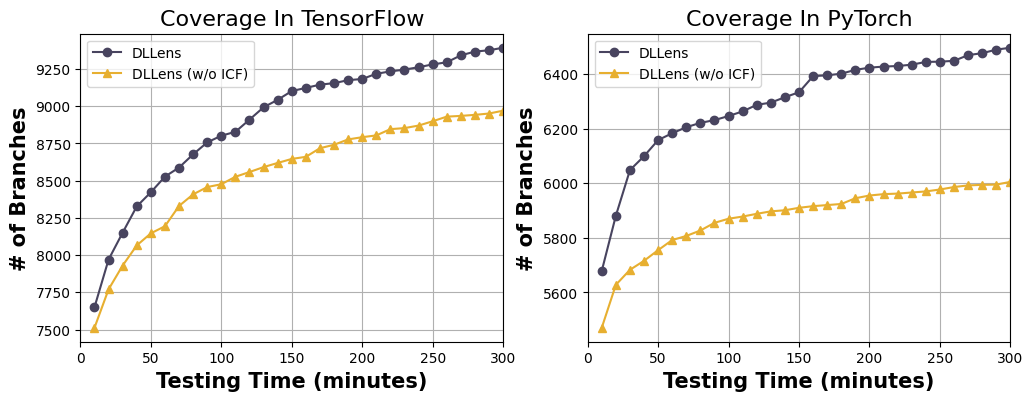

In [3]:
from toolbox import load_tool_cov

print("===== Report Tool Coverage =====")
coverage_res = {}
coverage_res["With-ICF"] = load_tool_cov("data/working_dir/rq2/coverage/with-icf.txt")
coverage_res["Without-ICF"] = load_tool_cov("data/working_dir/rq2/coverage/non-icf.txt")
import matplotlib.pyplot as plt
import numpy as np
tool1color = '#48445F'
tool2color = '#E7AF30'
# Draw the coverage trend
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plt.xlim(0, 300)
num_x = len(coverage_res["With-ICF"]["tensorflow"])
x = np.linspace(300//num_x, 300, num_x)
ax1.plot(x, coverage_res["With-ICF"]["tensorflow"], label="DLLens", color=tool1color, linestyle="-", marker="o")
ax1.plot(x, coverage_res["Without-ICF"]["tensorflow"], label="DLLens (w/o ICF)", color=tool2color, linestyle="-", marker="^")
ax1.legend()
ax1.grid()

ax1.set_title("Coverage In TensorFlow", fontsize=16)
ax1.tick_params(axis='x')
ax1.set_ylabel('# of Branches', fontsize=15, fontweight='bold')
ax1.set_xlabel('Testing Time (minutes)', fontsize=15, fontweight='bold')
ax1.set_xlim(0, 300)

ax2.plot(x, coverage_res["With-ICF"]["pytorch"], label="DLLens", color=tool1color, linestyle="-", marker="o")
ax2.plot(x, coverage_res["Without-ICF"]["pytorch"], label="DLLens (w/o ICF)", color=tool2color, linestyle="-", marker="^")
ax2.set_title("Coverage In PyTorch", fontsize=16)
ax2.tick_params(axis='x')
ax2.set_ylabel('# of Branches', fontsize=15, fontweight='bold')
ax2.set_xlabel('Testing Time (minutes)', fontsize=15, fontweight='bold')
ax2.set_xlim(0, 300)
ax2.legend()
ax2.grid()
# plt.show()
plt.savefig("figures/ablation_coverage_trend.pdf", format='pdf', bbox_inches='tight')